<a href="https://colab.research.google.com/github/gapself/machine-learning/blob/main/image-recognition-projects/mnist_optimizer_lossfunction_earlystopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import bibliotek
#### 🇬🇧 Import libraries
W tym miejscu importujemy biblioteki, które będą nam potrzebne do wytrenowania sieci neuronowej. Jeżeli w tym miejscu widoczny będzie błąd, to konieczne jest zainstalowanie biblioteki w danym środowisku. W takim wypadku wchodzimy w terminal, aktywujemy środowisko pracy, instalujemy biblioteki (pip install X).

In [ ]:
!pip install mnist

import tensorflow as tf
import numpy as np
import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import backend as K

# Rozpoczynamy od importu potrzebnych nam bibliotek, nowością jest EarlyStopping

### 2. Przygotowanie danych do analizy
#### 🇬🇧 Data preparation

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

Zatrzymajmy się na chwilę w tym miejscu. Na ostatnich zajęciach modyfikowaliśmy architekturę sieci neuronowej. Teraz przyszedł czas na wybór odpowiedniego optymalizatora, metryk oraz funkcji straty.

In [ ]:
model.compile(
  optimizer='adam',
  loss="categorical_crossentropy",
  metrics=['accuracy'],
)

### 3. Trenowanie modelu
#### 🇬🇧 Model training

### 📚 Zadanie 1.
##### Przeprowadź proces uczenia się z wykorzystaniem early stopping, wykonaj poniższe kroki.

1. Stwórz nową zmienną, którą nazwiesz f1, odwołaj się do early stopping, wprowadź odpowiednie wartości do parametrów takich jak monitor, mode, verbose oraz patience.
2. Stwórz nową zmienną, którą nazwiesz f2, odwołaj się do ModelCheckpoint, wprowadź nazwę dla swojego modelu oraz odpowiednie wartości dla parametru monitor, mode, verbose oraz save_best_only.
3. Stwórz nową zmienną, którą nazwiesz history. Zmienna ta powinna zawierać stworzone w poprzednim kroku dane treningowe (x), etykiety danych trningowych (y), dane testowe (a), etykiedy danych testowych (b) oraz odpowiednie wartości parametrów epochs oraz verbose.
4. Stwórz nową zmienną, którą nazwiesz trained_model, załaduj model używając nazwy modelu z punktu drugiego.
5. Stwórz nową zmienną, którą nazwiesz trai _accuracy, odwołaj się do trained_model.evaluate, użyj danych treningowych (x) oraz etykiet danych treningowych (y).
6. Stwórz nową zmienną, którą nazwiesz test_accuracy, odwołaj się do trained_model.evaluate, użyj danych testowych (a) oraz etykiet danych testowych (b).
7. Przeprowadź uczenie sieci dla liczby epok wynoszącej 100 przy wartości parametru patience wynoszącej 10. Po której epoce proces trenowania sieci się zatrzyma?

8. Wyświetl informacje dotyczące dokładności klasyfikacji na materiale treningowym oraz testowym.










```
Proces trenowania zatrzymał się na 17 epoce, patience, to liczba epok 
bez poprawy, po których trening zostaje przerwany. 
Accuracy modelu wyniosło na danych treningowych ~ 0.98. 
Na danych testowych ~0.97.
```



In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
#1
f1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

#2
f2 = ModelCheckpoint("Model1", mode="auto", monitor="val_loss", save_best_only=True, verbose=1)

#3
history = model.fit(train_images, train_labels, batch_size = None, validation_data = (test_images, test_labels)
, callbacks = [f1,f2], epochs=100,  verbose=1)

Epoch 1/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.3657 - accuracy: 0.8888
Epoch 1: val_loss improved from inf to 0.21777, saving model to Model1
INFO:tensorflow:Assets written to: Model1/assets
1875/1875 [==============================] - 13s 5ms/step - loss: 0.3650 - accuracy: 0.8890 - val_loss: 0.2178 - val_accuracy: 0.9363
Epoch 2/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.1898 - accuracy: 0.9424
Epoch 2: val_loss improved from 0.21777 to 0.15583, saving model to Model1
INFO:tensorflow:Assets written to: Model1/assets
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1899 - accuracy: 0.9424 - val_loss: 0.1558 - val_accuracy: 0.9529
Epoch 3/100
1864/1875 [============================>.] - ETA: 0s - loss: 0.1449 - accuracy: 0.9543
Epoch 3: val_loss improved from 0.15583 to 0.11954, saving model to Model1
INFO:tensorflow:Assets written to: Model1/assets
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1

In [ ]:
# #4
trained_model = load_model("Model1")

# #5
train_accuracy = trained_model.evaluate(train_images, train_labels)

# #6
test_accuracy = trained_model.evaluate(test_images, test_labels)

# #7
print(train_accuracy + test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0905 - accuracy: 0.9725
[0.059737056493759155, 0.9810000061988831, 0.09049393236637115, 0.9725000262260437]


### 📚 Zadanie 2.
##### Uruchom ponownie proces treningu sieci, tym razem wprowadzając zmianę związaną z funkcją straty oraz optymalizatora.

1. Wypróbuj inną funkcję straty (rozkład Poisona). Czy w przypadku naszego zbioru danych taka funkcja ma sens?


```
W tym przypadku rozkład Poisona pozytywnie wpłynął na wyniki, accuracy się polepszyło o 0.1 w porównaniu do Model1. 
Accuracy Model1:
na danych treningowych ~ 0.98, 
na danych testowych ~0.97,

Accuracy Model2:
na danych treningowych ~ 0.99, 
na danych testowych ~0.97,

Poza tym przy Poisonie proces uczenia zatrzymał się na epoce 11. W przypadku funkcji straty "categorical_crossentropy" na 17stej.
```

In [ ]:
model.compile(
  optimizer='adam',
  loss='Poisson',
  metrics=['accuracy'],
)

#1
f1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

#2
f2 = ModelCheckpoint("Model2", mode="auto", monitor="val_loss", save_best_only=True, verbose=1)

#3
history = model.fit(train_images, train_labels, batch_size = None, validation_data = (test_images, test_labels)
, callbacks = [f1,f2], epochs=100,  verbose=1)

Epoch 1/100
1857/1875 [============================>.] - ETA: 0s - loss: 0.1042 - accuracy: 0.9858
Epoch 1: val_loss improved from inf to 0.11009, saving model to Model2
INFO:tensorflow:Assets written to: Model2/assets
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1042 - accuracy: 0.9858 - val_loss: 0.1101 - val_accuracy: 0.9737
Epoch 2/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.1040 - accuracy: 0.9868
Epoch 2: val_loss did not improve from 0.11009
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1040 - accuracy: 0.9868 - val_loss: 0.1112 - val_accuracy: 0.9708
Epoch 3/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.1039 - accuracy: 0.9873
Epoch 3: val_loss did not improve from 0.11009
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1039 - accuracy: 0.9872 - val_loss: 0.1114 - val_accuracy: 0.9718
Epoch 4/100
1855/1875 [============================>.] - ETA: 0s - loss: 0.1035 - accuracy

In [ ]:
# #4
trained_model = load_model("Model2")

# #5
train_accuracy = trained_model.evaluate(train_images, train_labels)

# #6
test_accuracy = trained_model.evaluate(test_images, test_labels)

# #7
print(train_accuracy + test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1101 - accuracy: 0.9737
[0.10353159159421921, 0.9880333542823792, 0.11009445786476135, 0.9736999869346619]


2. Wypróbuj inny optymalizator (z wykorzystaniem algorytmu Adadelta). Czy obserwujesz jakieś zmiany w procesie uczenia się w porównaniu do algorytmu wykorzystanego w tutorialu (adam)? Gdzie może leżeć przyczyna tych różnic? (zob. https://keras.io/api/optimizers/adadelta).









```
Optymalizatory to algorytmy lub metody używane do zmiany atrybutów 
sieci neuronowej, takich jak wagi i szybkość uczenia się, 
w celu zmniejszenia strat.

Przy zmianie samego optimizer='adadelta' proces uczenia uzyskuje accuracy lepsze od Model1 o 0.02 i od Model2 o 0.01. Natomiast postępuje dużo wolniej kończąc na ostatniej wskazanej epoce, czyli na 100tnej. 

Accuracy Model1:
na danych treningowych ~ 0.98, 
na danych testowych ~0.97,

Accuracy Model2:
na danych treningowych ~ 0.99, 
na danych testowych ~0.97,

Accuracy Model3:
na danych treningowych ~ 1, 
na danych testowych ~0.98,

optimizer='adam' jest używany do przyspieszenia algorytmu opadania 
gradientu poprzez uwzględnienie „wykładniczo ważonej średniej” gradientów. 
Użycie średnich sprawia, że ​​algorytm zbliża się do minimów w szybkim 
tempie. Jeśli chce się szkolić sieć neuronową w krótszym czasie to należy wybrać alg Adam. 
```



In [ ]:
model.compile(
  optimizer='adadelta',
  loss="categorical_crossentropy",
  metrics=['accuracy'],
)

In [ ]:
#1
f1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
#2
f2 = ModelCheckpoint("Model3", mode="auto", monitor="val_loss", save_best_only=True, verbose=1)
#3
history = model.fit(train_images, train_labels, batch_size = None, validation_data = (test_images, test_labels)
, callbacks = [f1,f2], epochs=100,  verbose=1)

Epoch 1/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9910
Epoch 1: val_loss improved from inf to 0.11759, saving model to Model3
INFO:tensorflow:Assets written to: Model3/assets
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0256 - accuracy: 0.9910 - val_loss: 0.1176 - val_accuracy: 0.9737
Epoch 2/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.0236 - accuracy: 0.9918
Epoch 2: val_loss improved from 0.11759 to 0.11519, saving model to Model3
INFO:tensorflow:Assets written to: Model3/assets
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9918 - val_loss: 0.1152 - val_accuracy: 0.9741
Epoch 3/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 0.9925
Epoch 3: val_loss improved from 0.11519 to 0.11316, saving model to Model3
INFO:tensorflow:Assets written to: Model3/assets
1875/1875 [==============================] - 5s 3ms/step - loss: 0.02

In [ ]:
# #4
trained_model = load_model("Model3")
# #5
train_accuracy = trained_model.evaluate(train_images, train_labels)
# #6
test_accuracy = trained_model.evaluate(test_images, test_labels)
# #7
print(train_accuracy + test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0954 - accuracy: 0.9804
[0.006052340846508741, 0.9986166954040527, 0.09544965624809265, 0.980400025844574]


### 📚 Zadanie 3.
##### Niekiedy przydaje nam się możliwość wprowadzenia modyfikacji do funkcji straty lub zbudowania własnej funkcji straty od postaw. W Keras/Tensorflow jest to dosyć prosta rzecz, którą możemy zrealizować za pomocą podstawowych operacji.

Poniższy przykład ilustruje w jaki sposób możemy skorzystać z funkcji straty Root Mean Square Error (RMSE) dla dwóch zmiennych (y_true i y_pred).

In [ ]:
y_true = 43.2
y_pred = 4.2

In [ ]:
x = tf.keras.metrics.RootMeanSquaredError()
x(y_true, y_pred).numpy()

39.0

Czasami jednak możemy chcieć stworzyć naszą własną funkcję straty (podajemy przy tym dwa argumenty, tj. y_true oraz y_pred).

Odtwórz wskazaną wcześniej funkcję straty Root Mean Squared Error tworząc od podstaw nową funkcję.

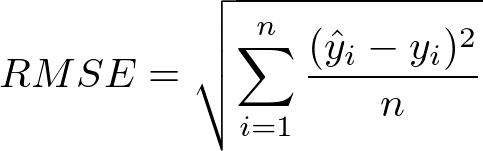

In [ ]:
import math

def custom_loss_function(y_true, y_pred):
  mse = np.square(np.subtract(y_true,y_pred)).mean() 
  rmse = math.sqrt(mse)
  return rmse

print("Wynik z przykładowymi danymi: ", custom_loss_function([1,2,3],[1,3,4]))
print(custom_loss_function(y_true, y_pred))

Wynik z przykładowymi danymi:  0.816496580927726
39.0
